# DATA CLEANING

In [74]:
# PACKAGES / libraries  
import pandas as pd
import seaborn as sns 

In [75]:
# Grabbing Excel file , inserting into python

In [76]:
df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")

C:\Users\david\AppData\Local\Temp\ipykernel_20388\2350612576.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [77]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [78]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [79]:
# USA races , 50Km and/or 50Mi, 2020
kilo_50 = df[df['Event distance/length'] == '50km' ]  # filtering in 50Km
miles_50 = df[df['Event distance/length'] == '50mi']  # filtering in 50Mi
Year = df[df['Year of event'] == 2020]     # filtering in Years

In [80]:
# filtering (USA) in 'Everglades 50 Mile Ultra Run (USA)'
usa_races = df[df['Event name'] == 'Everglades 50 Mile Ultra Run (USA)']['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)

In [81]:
# filtering SPECIFICALLY (USA) in 'Everglades 50 Mile Ultra Run (USA)'
filtered_usa_races = df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']
filtered_usa_races.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59


In [82]:
#  "Filtering rows where event distance is either 50km or 50mi".
km_mi_50 = df[ (df['Event distance/length'] == '50km') | (df['Event distance/length'] == '50mi')  ]

# ALTERNATIVE      ' isin ' 
# df[df['Event distance/length'].isin(['50km', '50mi'])]


# Joining All three Year,km,mi
#km_mi_Year = df[((df['Event distance/length'] == '50km') | (df['Event distance/length'] == '50mi'))  &  (df['Year of event'] == 2020) ]
# ALTERNATIVE      ' isin ' 
km_mi_Year = df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020)]

In [83]:
# Combining all filters together
all_filtered = df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event'] == 2020) & (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')]
all_filtered

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349


In [84]:
all_filtered.shape

(26090, 13)

In [85]:
#remove (UAS) from the Event name
all_filtered['Event name'].str.split('(').str.get(0)

2539945    West Seattle Beach Run - Winter Edition 
2539946    West Seattle Beach Run - Winter Edition 
2539947    West Seattle Beach Run - Winter Edition 
2539948    West Seattle Beach Run - Winter Edition 
2539949    West Seattle Beach Run - Winter Edition 
                             ...                   
2760957     Yankee Springs Fall Trail Run Festival 
2760958     Yankee Springs Fall Trail Run Festival 
2760959     Yankee Springs Fall Trail Run Festival 
2760960     Yankee Springs Fall Trail Run Festival 
2760961     Yankee Springs Fall Trail Run Festival 
Name: Event name, Length: 26090, dtype: object

In [86]:
all_filtered['Event name'] =  all_filtered['Event name'].str.split('(').str.get(0)

C:\Users\david\AppData\Local\Temp\ipykernel_20388\2042222164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_filtered['Event name'] =  all_filtered['Event name'].str.split('(').str.get(0)


In [87]:
all_filtered.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


In [88]:
# Cleaning up athlete age
all_filtered['athlete_age'] = 2020 - all_filtered['Athlete year of birth']

C:\Users\david\AppData\Local\Temp\ipykernel_20388\1715506597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_filtered['athlete_age'] = 2020 - all_filtered['Athlete year of birth']


In [89]:
#remove h from athlete perforamce
all_filtered['Athlete performance'] = all_filtered['Athlete performance'].str.split(' ').str.get(0)

C:\Users\david\AppData\Local\Temp\ipykernel_20388\1365605040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_filtered['Athlete performance'] = all_filtered['Athlete performance'].str.split(' ').str.get(0)


In [90]:
all_filtered.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


In [91]:
# drop columns: Athlete Club, Athlete Country, Athlete year of birth, Athlete Age Category
all_filtered = all_filtered.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)
all_filtered.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0


In [92]:
# Clean up null values

In [93]:
all_filtered.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  233
dtype: int64

In [94]:
all_filtered[all_filtered['athlete_age'].isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [95]:
all_filtered = all_filtered.dropna()

In [96]:
all_filtered.shape

(25857, 10)

In [97]:
# check for dupes
all_filtered[all_filtered.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [98]:
# reset index
all_filtered.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,39.0


In [99]:
# fix types
all_filtered.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [100]:
all_filtered['athlete_age'] = all_filtered['athlete_age'].astype(int)

In [101]:
all_filtered['Athlete average speed'] = all_filtered['Athlete average speed'].astype(float)

In [102]:
all_filtered.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int32
dtype: object

In [103]:
# rename columns
# Year of event                  int64
# Event dates                   object
# Event name                    object
# Event distance/length         object
# Event number of finishers      int64
# Athlete performance           object
# Athlete gender                object
# Athlete average speed        float64
# Athlete ID                     int64
# athlete_age                    int32

In [104]:
all_filtered = all_filtered.rename(columns = {
    'Year of event'            :'year',
    'Event dates'             :'race_day',
    'Event name'              :'race_name',
    'Event distance/length'   :'race_length',
    'Event number of finishers':'race_number_of_finishers',
    'Athlete performance'     :'athlete_performance',
    'Athlete gender'          :'athlete_gender',
    'Athlete average speed'  :'athlete_average_speed',
    'Athlete ID'               :'athlete_id',
})

In [105]:
all_filtered.head()


,year,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [106]:
# reorder columns
df3 = all_filtered[['race_day', 'race_name', 'race_length', 'race_number_of_finishers', 'athlete_performance',  'athlete_gender',   'athlete_average_speed', 'athlete_id', 'athlete_age']]

In [107]:
df3.head()

,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43


In [108]:
# find 2 races that ran in 2020 - Sarasota | Everglades
df3[df3['race_name'] == 'Everglades 50 Mile Ultra Run ']

,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2591476,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,8:31:39,M,9.436,820757,27
2591477,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,8:31:48,M,9.433,46432,39
2591478,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,8:34:43,M,9.380,813617,34
2591479,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:07:35,M,8.817,820758,33
2591480,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:15:32,M,8.691,647115,30
2591481,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:18:05,M,8.651,696063,26
2591482,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:19:10,M,8.634,222509,23
2591483,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:20:51,M,8.608,820759,36
2591484,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:26:15,F,8.526,359359,26
2591485,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:26:16,M,8.526,103020,42


In [109]:
# 222509
df3[df3['athlete_id'] == 222509]

,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2591482,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:19:10,M,8.634,222509,23
2616900,22.02.2020,Manasota Track Club 50K,50km,36,4:49:16,M,10.371,222509,23


<Axes: xlabel='race_length', ylabel='Count'>

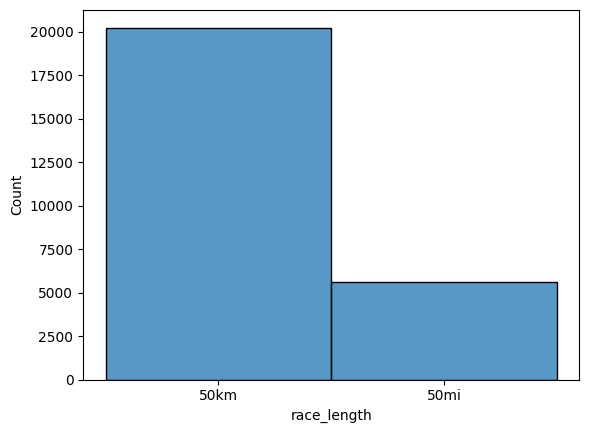

In [110]:
sns.histplot(df3['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

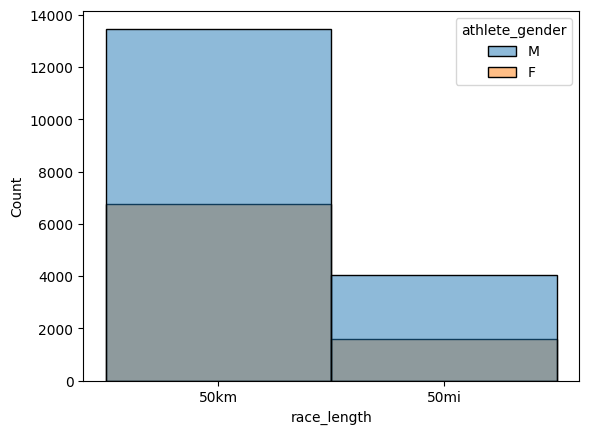

In [111]:
sns.histplot(df3, x='race_length', hue='athlete_gender')

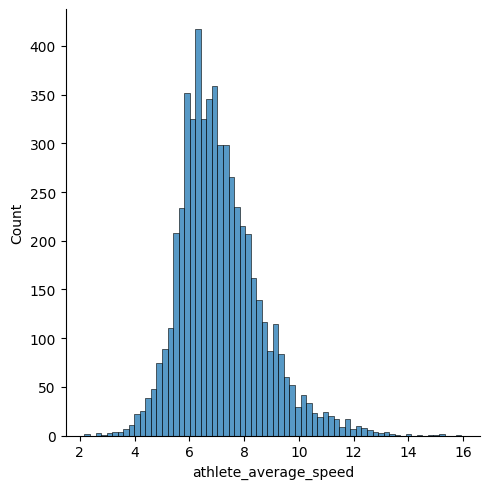

In [112]:
sns.displot(df3[df3['race_length']== '50mi']['athlete_average_speed'])

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

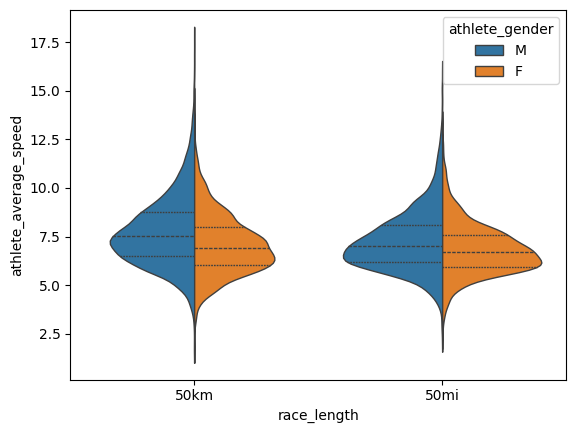

In [113]:
sns.violinplot(data=df3, x='race_length', y='athlete_average_speed', hue='athlete_gender', split=True, inner='quart', linewidth=1)

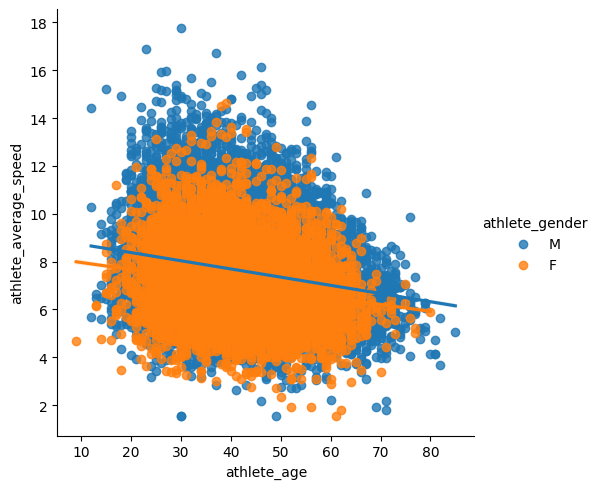

In [114]:
sns.lmplot(data=df3, x='athlete_age', y='athlete_average_speed', hue='athlete_gender' )

In [115]:
#questions I want to find out from the data 

In [116]:
# race_day               
# race_name              
# race_length            
# race_number_of_finishers 
# athlete_id 
# athlete_gender 
# athlete_age
# athlete_performance    
# athlete_average_speed 

In [117]:
# Difference in speed for the 50km 50mi male to female

In [118]:
df3.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

In [119]:
# What age groups are the best in the 50m Race (20 + races min)

In [120]:
df3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False).query('count>19').head(15)

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


In [121]:
# Seasons for the data -> slower in summer than winter?

# spring 3-5
# summer 6-8
# fall 9-11
# winter 12-2

# split between two deicmals

In [122]:
df3['race_month'] = df3['race_day'].str.split('.').str.get(1).astype(int)

In [123]:
df3.head(15)

,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age,race_month
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29,2
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39,2
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21,2
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37,2
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43,2
2539950,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:42:06,F,10.635,810282,35,2
2539951,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:20,M,10.369,11739,59,2
2539952,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:50,M,10.351,80394,50,2
2539953,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:51:00,F,10.309,140909,45,2
2539954,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,5:02:35,M,9.915,753889,41,2


In [124]:
df3['race_season'] = df3['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else "Winter")

In [125]:
df3.head(25)

,race_day,race_name,race_length,race_number_of_finishers,athlete_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age,race_month,race_season
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,29,2,Winter
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,39,2,Winter
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,21,2,Winter
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,37,2,Winter
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,43,2,Winter
2539950,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:42:06,F,10.635,810282,35,2,Winter
2539951,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:20,M,10.369,11739,59,2,Winter
2539952,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:50,M,10.351,80394,50,2,Winter
2539953,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:51:00,F,10.309,140909,45,2,Winter
2539954,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,5:02:35,M,9.915,753889,41,2,Winter


In [126]:
df3.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653


In [127]:
# 50 miler only
df3.query('race_length == "50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.048442,1977
Summer,6.505776,817
